#    Implementing machine learning to predict a patient's likelihood                                                        of having CDMS
## By Ria Tilak Bhattacharya
## Registration Number :  2214122

# Table of contents
1. [Introduction](#introduction)
2. [Dataset Explanation](#dataset)
3. [Preliminary Analysis](#prelim)
    1. [Null Value Check](#nullvaluecheck)
    2. [Class Imbalance Checking](#classimbalance)
4. [Exploratory Data Analysis](#EDA)
    1. [Univariate Data Analysis](#Uni)
    2. [Bivariate Data Analysis](#bivariate)
    3. [Numerical Data Analysis](#numerical)
5. [Correlation map](#corr)
6. [Methods](#method)
    1. [Train and test data sets](#traintest)
    2. [Feature Importances](#imp)
    3. [Normalize and Scaling the data](#scale)
    4. [Choosing the best parameters for the model](#param)
    5. [Model Metrics](#metrics)
    6. [k fold cross validation](#cv)
    7. [Prediction on train and test models](#pred)
    8. [Ensemble Voting Classifier](#ensemble)
    9. [Compare the train and test scores for the models](#compare)
    10. [Prediction results](#predresults)
    11. [Explainable AI](#AI)
7. [Results and Discussion](#results)
8. [Conclusion](#concl)
9. [References](#ref)

# Introduction  <a name="introduction"></a>
Multiple Sclerosis(MS) is a degenerative disease.It is a type of autoimmune disease where the immune system mistakenly targets healthy cells.Myelin is the protective sheath that surrounds nerves in the brain and spinal cord.The cells in myelin gets attacked by the immune system in bodies of people suffereing from MS. This damage to the myelin sheath disrupts nerve signals travelling from the brain to other parts of the body. This damage can affect our brains,eyes and spinal cord.Women are typically more affected by MS than males are. The majority of MS patients are diagnosed between the ages of 20 and 40.
<br>
In our report we are going to analyse a dataset consisting of symptoms and information about some patients and try to build machine learning models which can correctly predict whether a patient has CDMS or non-CDMS.CDMS stands for Clinically Isolated Syndrome (CIS) with Dissemination in Space.The fact that CDMS frequently serves as the first indicator of multiple sclerosis makes it significant. Multiple sclerosis diagnosis criteria are more likely to be met in subsequent clinical episodes or symptoms in people with CDMS. In order to slow the progression of the disease and effectively manage the symptoms, monitoring and appropriate management are essential at this point.
<br>
We will train standalone models such as KNN,Decision Tree,Random Forest,SVM,Adaboost,BernoulliNB,Logistic Regression, and an ensemble model named Ensemble Voting Classifier.We will treat this as a binary classification problem where the models have to predict based on all the data provided whether the patient falls in CDMS or nonCDMS category.


# Dataset Explanation <a name="dataset"></a>
This data was collected in a study conducted in Mexican mestizo patients newly diagnosed with CIS who presented at the National Institute of Neurology and Neurosurgery (NINN) in Mexico City, Mexico, between 2006 and 2010.The dataset has been taken from Kaggle.[1] There are 273 patient records with 19 variables.
# Data Description
ID: Patient identifier (int)
<br>
Age: Age of the patient (in years)
<br>
Schooling: time the patient spent in school (in years)
<br>
Gender: 1=male, 2=female
<br>
Breastfeeding: 1=yes, 2=no, 3=unknown
<br>
Varicella: 1=positive, 2=negative, 3=unknown
<br>
Initial_Symptoms: 1=visual, 2=sensory, 3=motor, 4=other, 5= visual and sensory, 6=visual and motor, 7=visual and others, 8=sensory and motor, 9=sensory and other, 10=motor and other, 11=Visual, sensory and motor, 12=visual, sensory and other, 13=Visual, motor and other,14=Sensory, motor and other, 15=visual,sensory,motor and other
<br>
Mono _or_Polysymptomatic: 1=monosymptomatic, 2=polysymptomatic, 3=unknown
<br>
Oligoclonal_Bands: 0=negative, 1=positive, 2=unknown
<br>
LLSSEP(lower limb Somatosensory evoked potentials): 0=negative, 1=positive
<br>
ULSSEP(upper limb Somatosensory evoked potentials):0=negative, 1=positive
<br>
VEP(Visual evoked potential):0=negative, 1=positive
<br>
BAEP(brainstem auditory evoked potentials): 0=negative, 1=positive
<br>
Periventricular_MRI:0=negative, 1=positive
<br>
Cortical_MRI: 0=negative, 1=positive
<br>
Infratentorial_MRI:0=negative, 1=positive
<br>
Spinal_Cord_MRI: 0=negative, 1=positive
<br>
initial_EDSS(Expanded Disability Status Scale):A method of quantifying disability in multiple sclerosis and monitoring changes in the level of disability over time.
<br>
final_EDSS(Expanded Disability Status Scale):
<br>
Group: 1=CDMS, 2=non-CDMS

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
#set the working directory and load the dataset
MS = pd.read_csv("E:/DataScandApp/MA336/MultipleSclerosis.csv") 
#information about the dataset
MS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

# Preliminary Analysis <a name="dataset"></a>
## Data Pre processing


### 1.Null Value check  <a name="nullvaluecheck"></a>
Firstly,we drop the first column Unnamed as this doesnt have any impact on the data. We check for null values in the data. Schooling and Initial_Symptom has only one missing value each.So we replace these values with zero.Initial_EDSS and Final_EDSS have 148 missing values each so we drop these two columns.

In [3]:
##drop the first column unnamed as this doesnt have any impact on the data
MS.drop('Unnamed: 0',axis=1,inplace=True)
##Check for null values
MS.isna().sum()

Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [4]:
#drop columns Initial_EDSS,Final_EDSS
MS.drop(['Initial_EDSS', 'Final_EDSS'], axis =1, inplace = True)
##fill values of the columnsSchooling and Initial_Symptom
MS['Schooling'] = MS['Schooling'].fillna(0)
MS['Initial_Symptom'] = MS['Initial_Symptom'].fillna(0)

In [5]:
##check for NA values again
MS.isna().sum()

Gender                     0
Age                        0
Schooling                  0
Breastfeeding              0
Varicella                  0
Initial_Symptom            0
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
group                      0
dtype: int64

In [6]:
#shape of the data
MS.shape


(273, 17)

So we now have 17 variables.The first 16 columns will be used to predict the 17th target column of group where 1 means CDMS and 2 means nonCDMS.

# Class imbalance checking <a name="classimbalance"></a>
We examined the two groups of data for group variable to check for any class imbalance. We see that the ratio is 54:45 for the two classes of non-CDMS and CDMS as ssen in the pie chart below.There is no significant class imbalance present in the data.

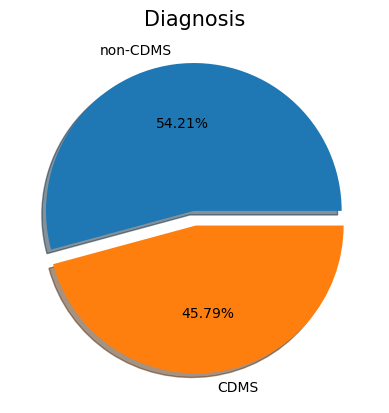

In [7]:
#The target variable is Group which has two value 1 amd 2,where 1 the patient has 
#CDMS and 2 indicates non CDMS
#check for data imbalance
import matplotlib.pyplot as plt
MS['group'].value_counts()
plt.pie(MS['group'].value_counts(), labels=['non-CDMS','CDMS'], 
        explode=[0.05, 0.05],autopct='%1.2f%%', shadow=True)
plt.title('Diagnosis', fontsize=15)

plt.show()

# Exploratory Data Analysis (EDA) <a name="EDA"></a>


## Univariate Data Analysis  <a name="Uni"></a>
 We have plotted the categorical columns in our dataset to get a better idea of the counts of the different categories present for each variable. From the graphical representation we aim to achieve a better understanding of the type of data the predictor variables consist of in the dataset.

In [8]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

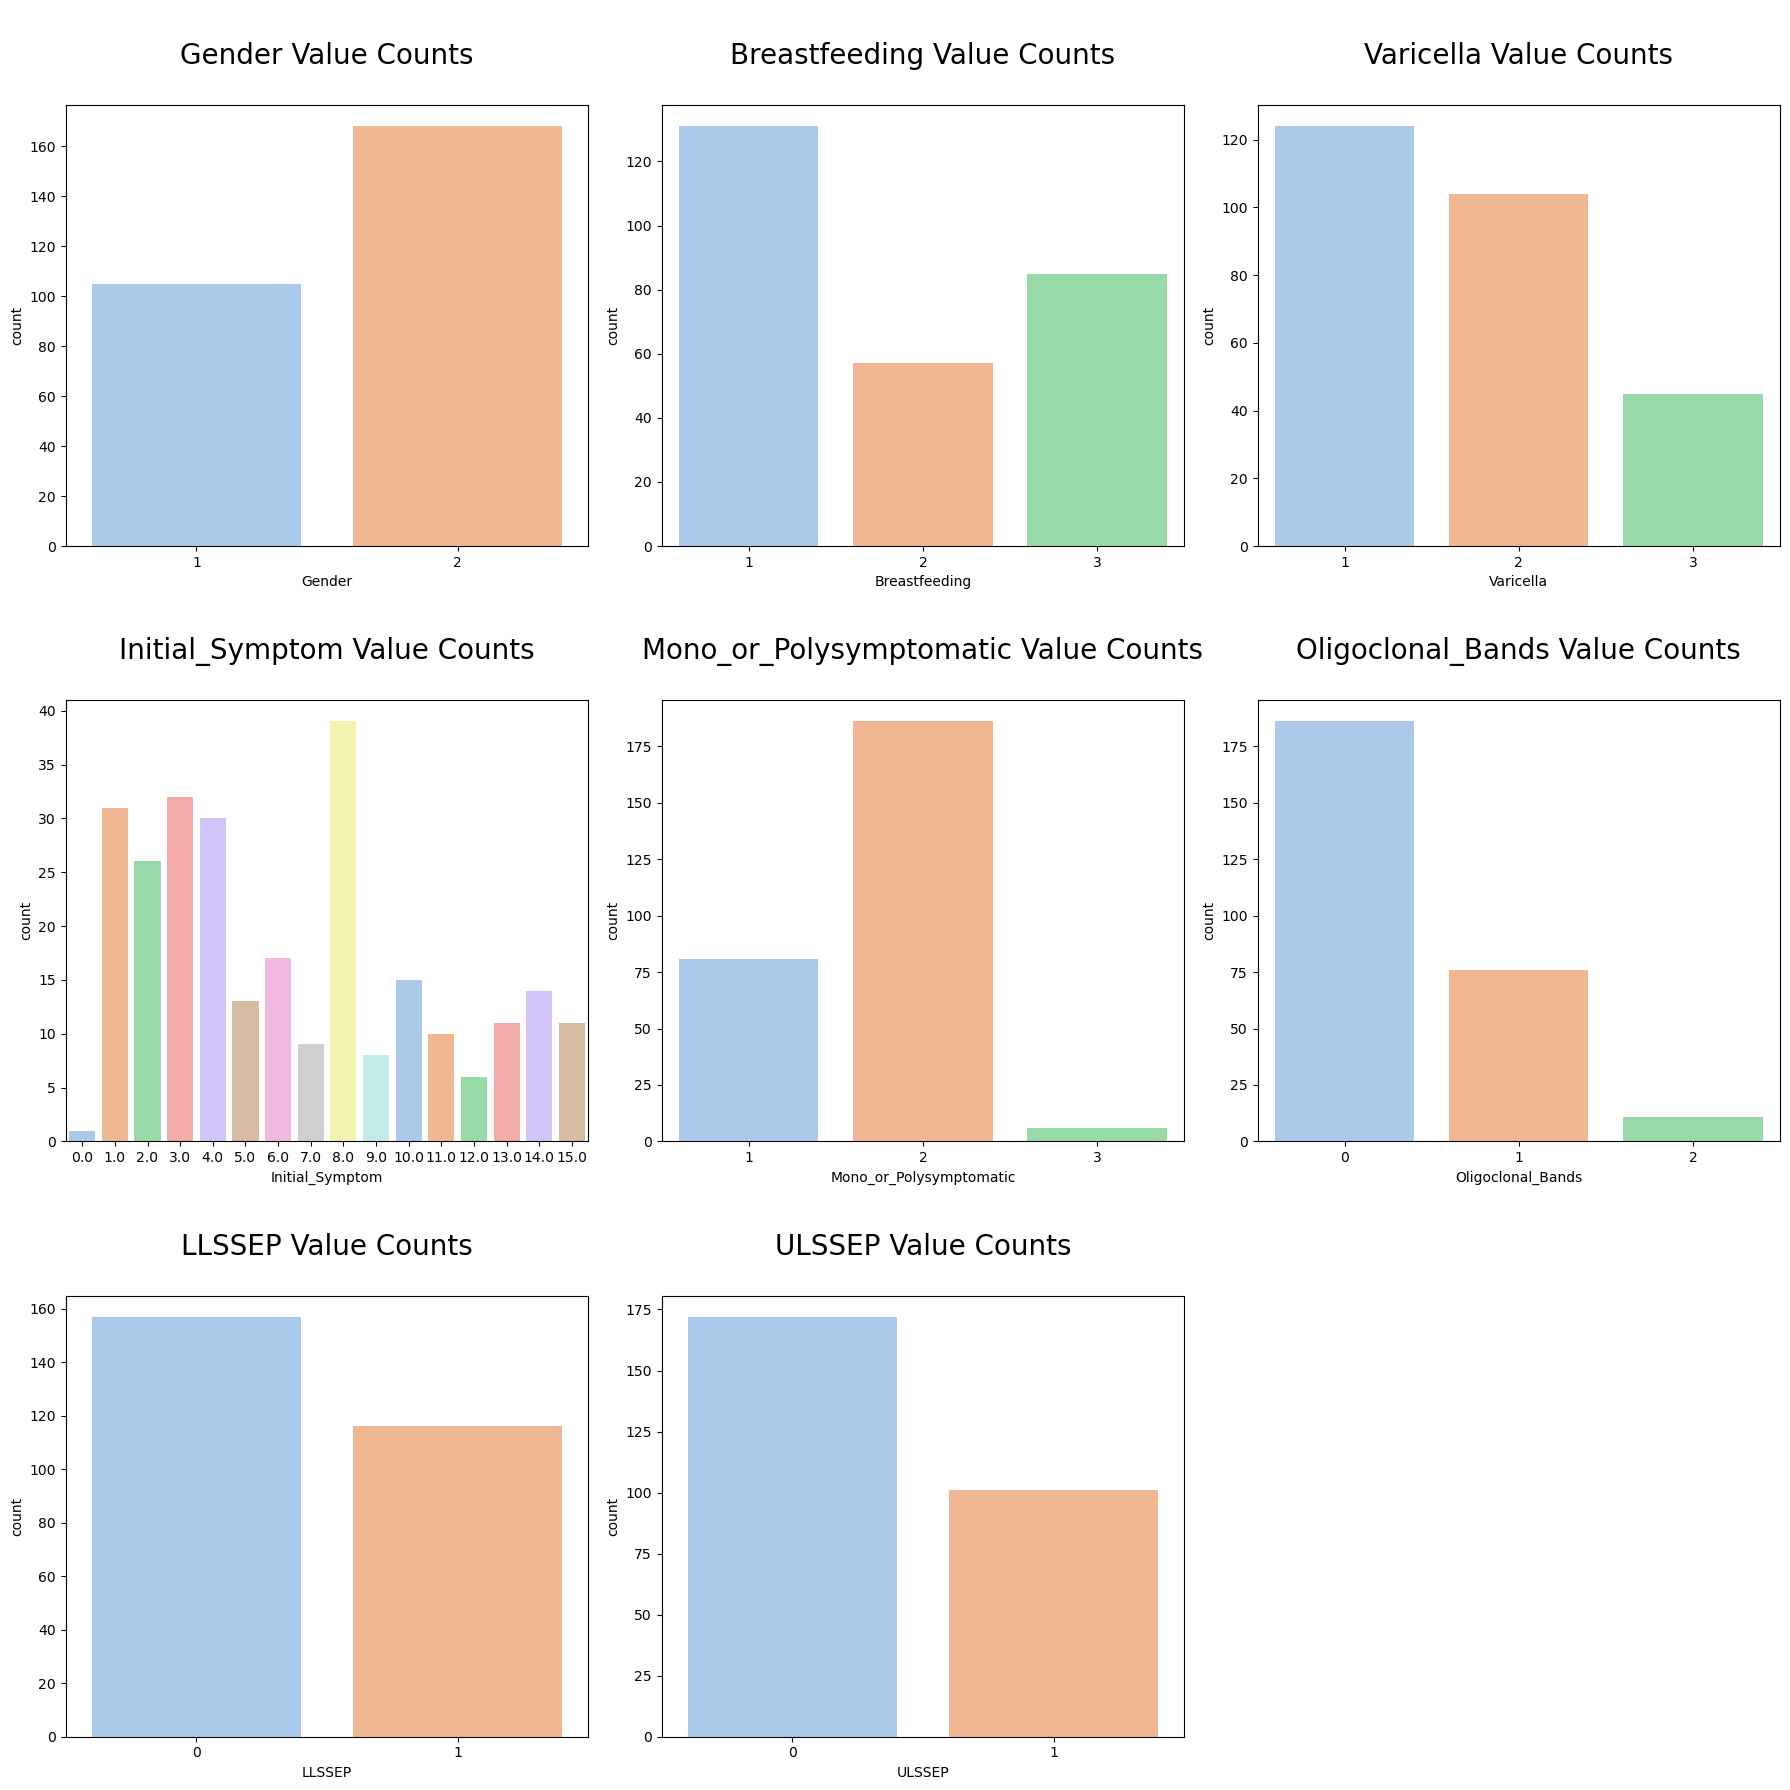

In [9]:
#Checking the categorical columns data
# creating a list of categorical coumns
colsList = ['Gender', 'Breastfeeding', 'Varicella', 'Initial_Symptom',
        'Mono_or_Polysymptomatic', 'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP']

plt.figure(figsize = (18, 18))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(colsList)):
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(x = colsList[i], data = MS, ax = ax, palette='pastel')
        plt.title(f"\n{colsList[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

1.In gender category we observe that there are more women patients than men.(1=male, 2=female)
<br>
 2.For breastfeeding highest count is for Yes followed by Unknown then no.(1=yes, 2=no, 3=unknown)
<br>
 3.Maximum patients suffered from varicella(chickenpox),the second highest count is for those who tested negative for varicella (1=positive, 2=negative, 3=unknown)
<br>
 4.Initial_Symptoms has 15 categories overall.Highest count is for category 8 (sensory and motor), category 3(motor),1(visual) and 4(other) are the second,third and fourth highest respectively.(1=visual, 2=sensory, 3=motor, 4=other, 5= visual and sensory, 6=visual and motor, 7=visual and others, 8=sensory and motor, 9=sensory and other, 10=motor and other, 11=Visual, sensory and motor, 12=visual, sensory and other, 13=Visual, motor and other,14=Sensory, motor and other, 15=visual,sensory,motor and other)
<br>
 5.There more number of patients who are polysymptomatic than mono symptomatic.(1=monosymptomatic, 2=polysymptomatic, 3=unknown)
<br>
6.Negative count is higher than positive for Oligoclonal_Bands.(0=negative, 1=positive, 2=unknown)
7.For LLSSEP and ULSSEP also the negative count is higher than positive symptom count.

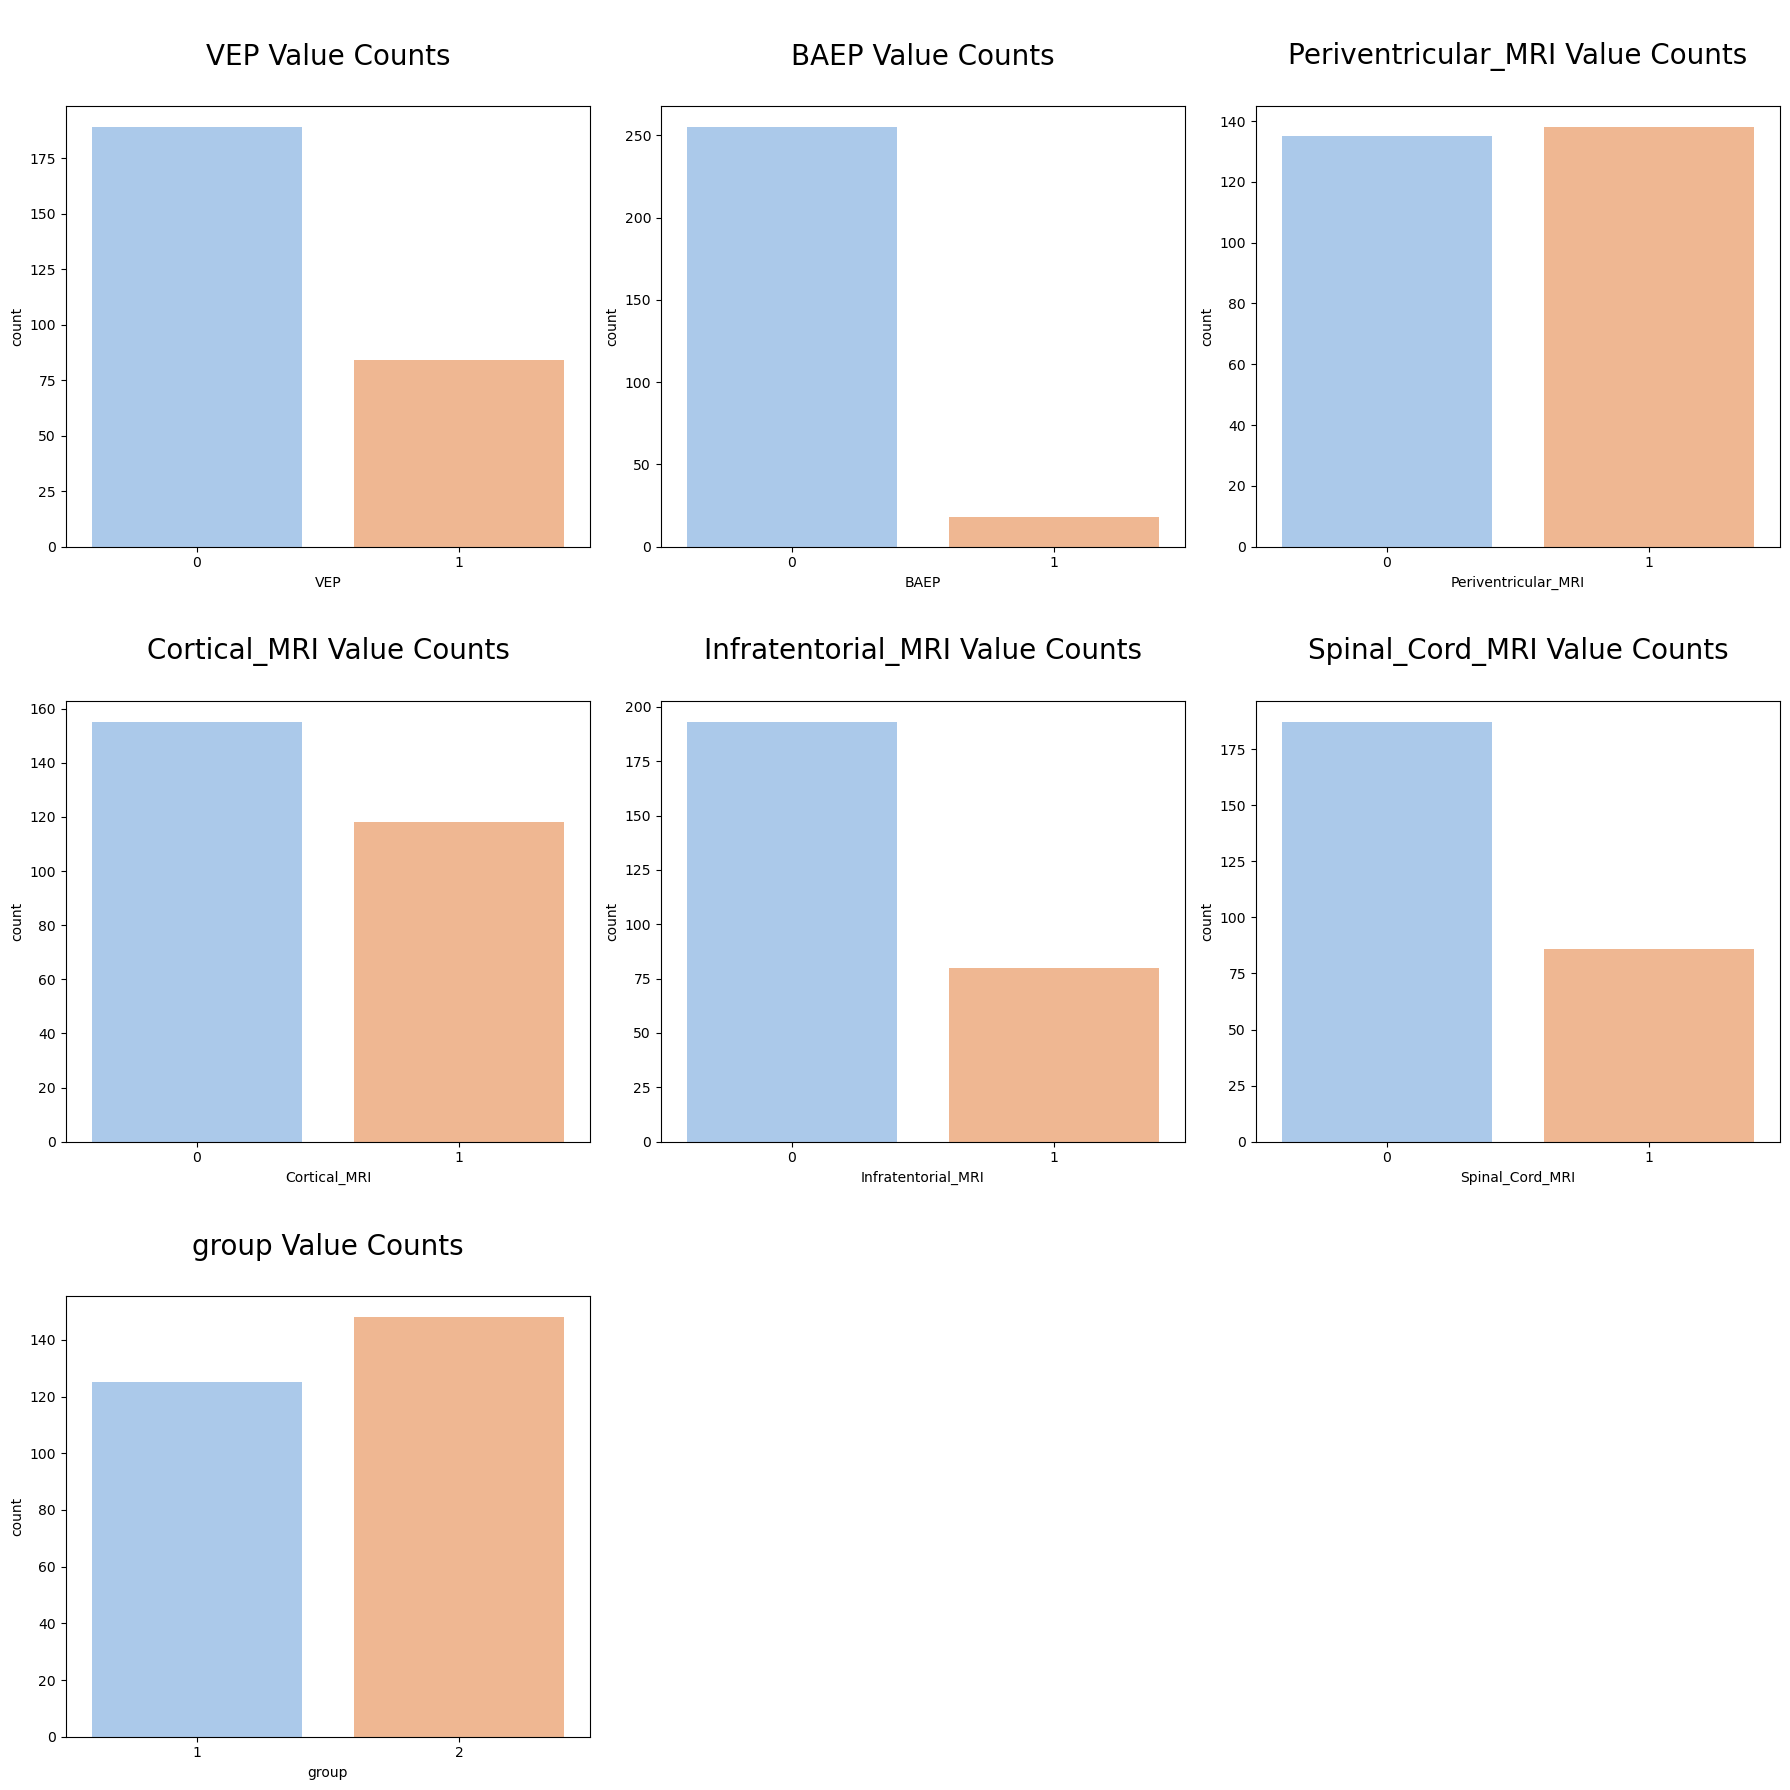

In [10]:
# creating a list of categorical coumns     
colsList = [  'VEP','BAEP','Periventricular_MRI','Cortical_MRI',
            'Infratentorial_MRI','Spinal_Cord_MRI','group']  
plt.figure(figsize = (18, 18))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(colsList)):
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(x = colsList[i], data = MS, ax = ax, palette='pastel')
        plt.title(f"\n{colsList[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In the above image for categorical variables we observe that for VEP,BAEP,Cortical_MRI,Infratentorial_MRI and Spinal_Cord_MRI negative count is more than positive.In case of Periventricular_MRI the count for positive symptoms is slightly higher than the negative one.(0=negative, 1=positive)
<br>
As we observed before when we checked for class imbalance here also we see that the numbers for the non-CDMS group are slightly higher than CDMS patients.

# Bivariate data analysis <a name="bivariate"></a>
In this section we have displayed the frequencies of all the categorical variables for the two categories of our target variable group: CDMS and non-CDMS .

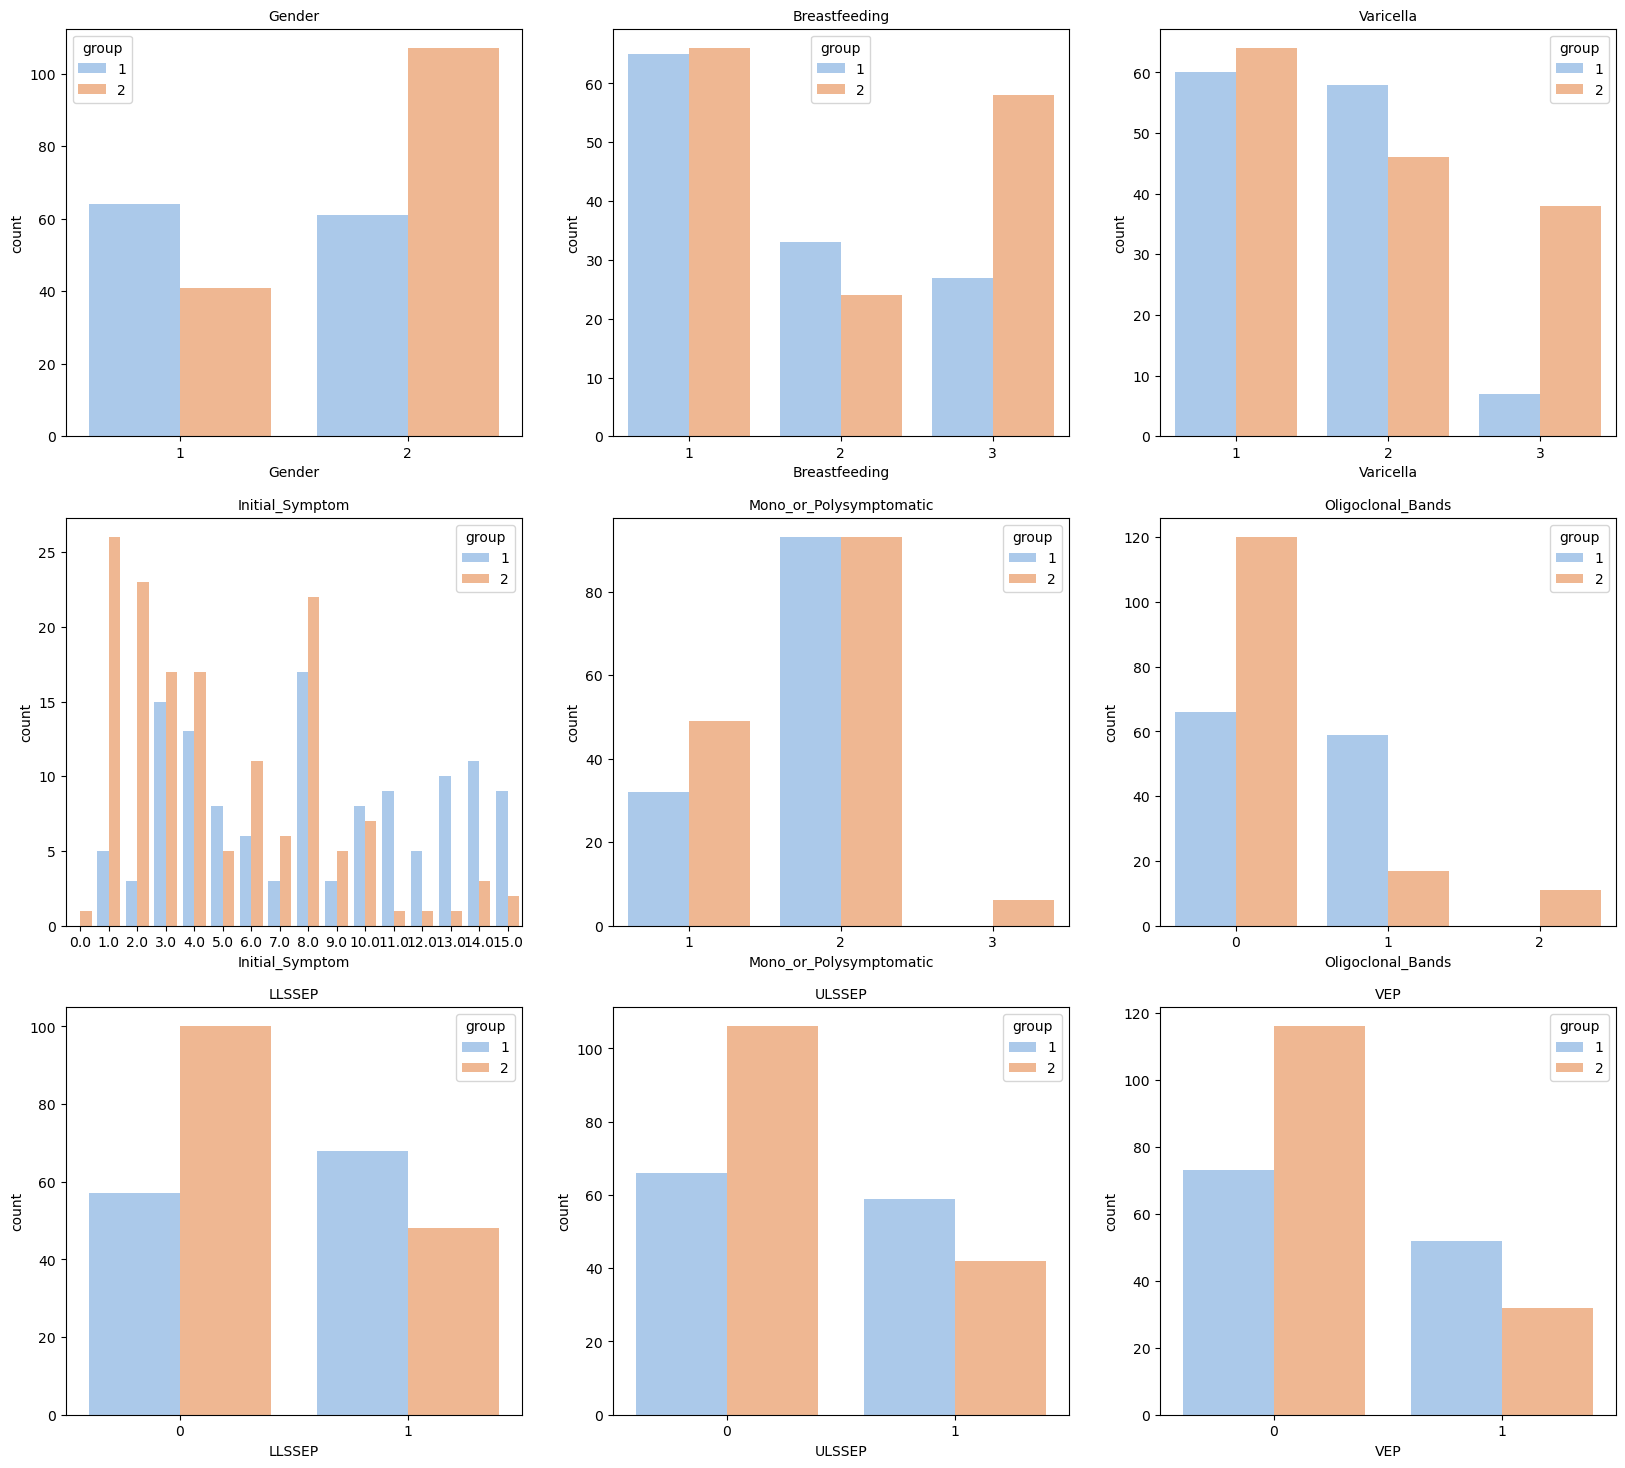

In [11]:
plt.figure(figsize=(20, 18))

plt.subplot(3, 3, 1)
sns.countplot(x='Gender', hue='group', data=MS, palette='pastel')
plt.title('Gender', fontsize=10)

plt.subplot(3, 3, 2)
sns.countplot(x='Breastfeeding', hue='group', data=MS, palette='pastel')
plt.title('Breastfeeding', fontsize=10)

plt.subplot(3, 3, 3)
sns.countplot(x='Varicella', hue='group',  data=MS, palette='pastel')
plt.title('Varicella', fontsize=10)

plt.subplot(3, 3, 4)
sns.countplot(x='Initial_Symptom', hue='group',  data=MS, palette='pastel')
plt.title('Initial_Symptom', fontsize=10)

plt.subplot(3, 3, 5)
sns.countplot(x='Mono_or_Polysymptomatic', hue='group',  data=MS, palette='pastel')
plt.title('Mono_or_Polysymptomatic', fontsize=10)

plt.subplot(3, 3, 6)
sns.countplot(x='Oligoclonal_Bands', hue='group',  data=MS, palette='pastel')
plt.title('Oligoclonal_Bands', fontsize=10)

plt.subplot(3, 3, 7)
sns.countplot(x='LLSSEP', hue='group',  data=MS, palette='pastel')
plt.title('LLSSEP', fontsize=10)

plt.subplot(3, 3, 8)
sns.countplot(x='ULSSEP', hue='group',  data=MS, palette='pastel')
plt.title('ULSSEP', fontsize=10)

plt.subplot(3, 3, 9)
sns.countplot(x='VEP', hue='group',  data=MS, palette='pastel')
plt.title('VEP', fontsize=10)

plt.show()

1.There is higher incidence of CDMS cases in males and in females nonCDMS cases are more.
<br>
2.The numbers for two groups are same for breastfeeding was done and the cases where it was not done CDMS cases are higher than non-CDMS.(1=yes, 2=no, 3=unknown)
<br>
3.For patients positive for varicella the numbers for non-CDMS are slightly higher than CDMS.ANd for negative varicella cases CDMS diagnoses are higher.
<br>
4.For Intial_Symptom we see that for categories 5,10,11,12,13,14,15 CDMS cases are higher than non-CDMS.(5= visual and sensory,10=motor and other, 11=Visual,sensory and motor, 12=visual,sensory and other, 13=Visual, motor and other,14=Sensory, motor and other, 15=visual,sensory,motor and other) And for the rest of the categories non-CDMS cases are higher.(1=visual, 2=sensory, 3=motor, 4=other, 6=visual and motor, 7=visual and others, 8=sensory and motor, 9=sensory and other)
<br>
5.The monosymptomatic category has more nonCDMS data than CDMS.Polysymptomatic category has same cases for both groups.
<br>
6.Oligoclonal_Bands,LLSSEP,ULSSEP and VEP all have more cases for nonCDMS in negative category and more cases in CDMS for positive category.
<br>

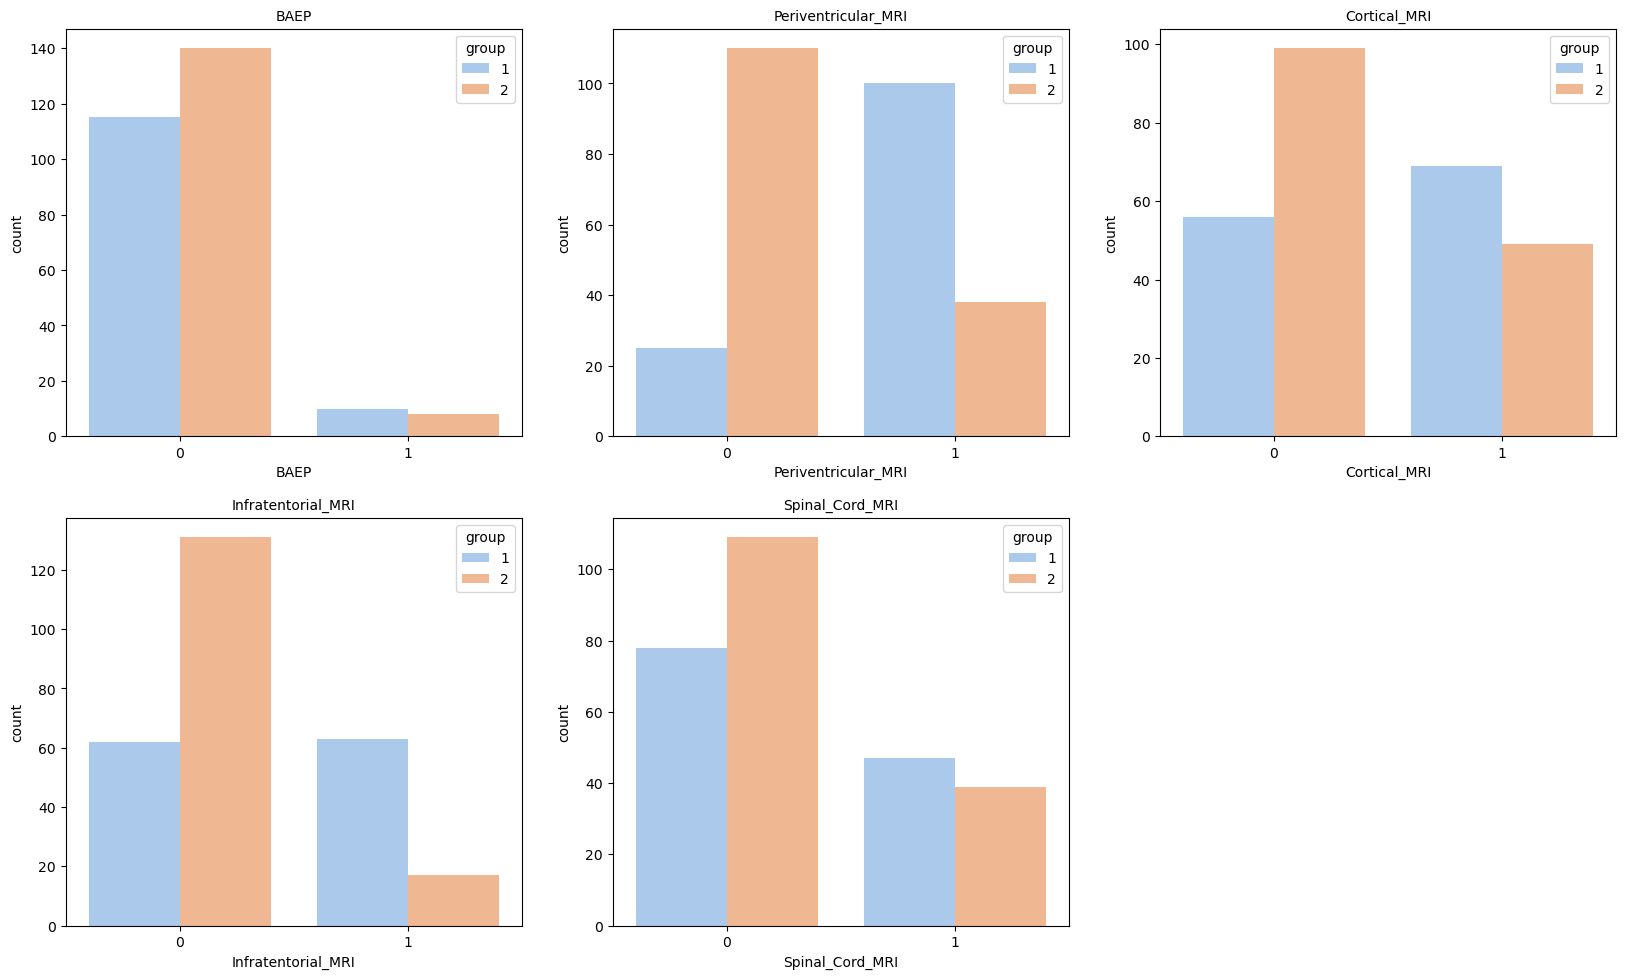

In [12]:
plt.figure(figsize=(20, 18))

plt.subplot(3, 3, 1)
sns.countplot(x='BAEP', hue='group', data=MS, palette='pastel')
plt.title('BAEP', fontsize=10)

plt.subplot(3, 3, 2)
sns.countplot(x='Periventricular_MRI', hue='group', data=MS, palette='pastel')
plt.title('Periventricular_MRI', fontsize=10)

plt.subplot(3, 3, 3)
sns.countplot(x='Cortical_MRI', hue='group',  data=MS, palette='pastel')
plt.title('Cortical_MRI', fontsize=10)

plt.subplot(3, 3, 4)
sns.countplot(x='Infratentorial_MRI', hue='group',  data=MS, palette='pastel')
plt.title('Infratentorial_MRI', fontsize=10)

plt.subplot(3, 3, 5)
sns.countplot(x='Spinal_Cord_MRI', hue='group',  data=MS, palette='pastel')
plt.title('Spinal_Cord_MRI', fontsize=10)

plt.show()

In the above data visualization for the categorical variables we observe that the variables BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI and Spinal_Cord_MRI have more cases for nonCDMS in negative category and more cases in CDMS for positive category.

# Numerical variables <a name="numerical"></a>
We can observe the data distribution of the numerical variables in the figures given below.

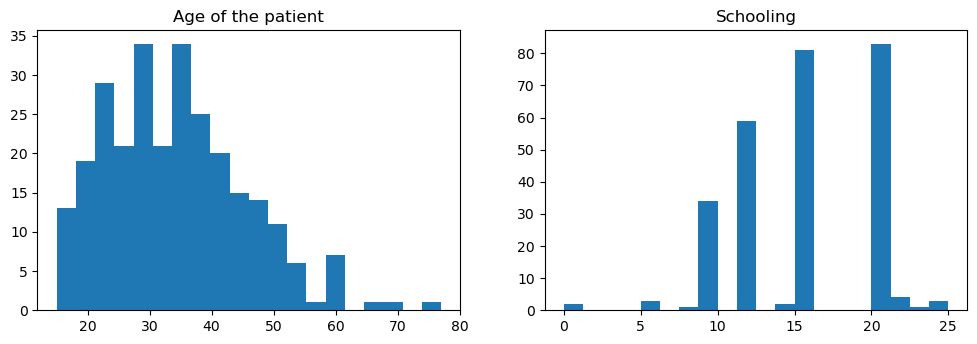

In [13]:

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(MS['Age'], bins=20)
plt.title('Age of the patient')

plt.subplot(2, 2, 2)
plt.hist(MS['Schooling'], bins=20)
plt.title('Schooling')

plt.show()

The most number of patients are in the age group of 20-45.Most of the subject have had 20 years of schooling followed by 15 years.

# Correlation map <a name="corr"></a>

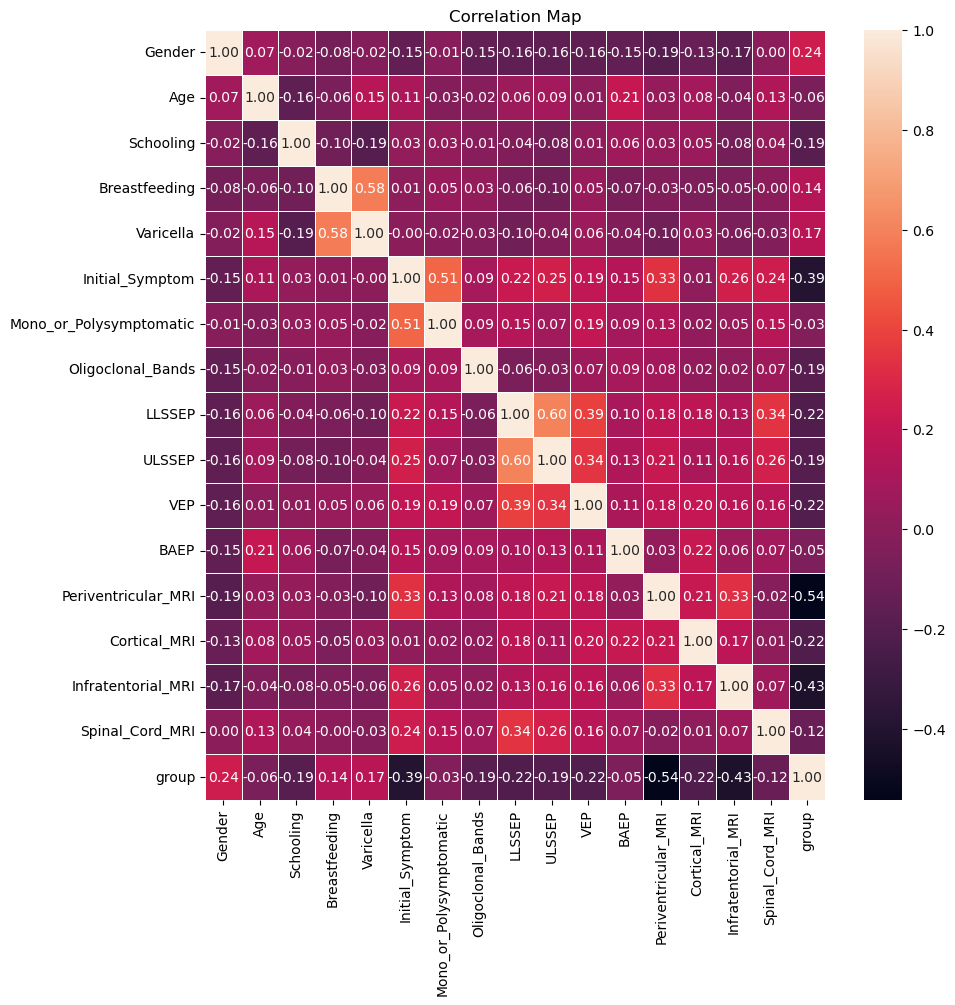

In [14]:
#The range of these numbers are -1 to 1.If the number is positive that indicates the 
#two variables are positively correlated.A negative value indicates that there is 
#negative correlation and zero means there is no correlation.
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(MS.corr(),annot= True,linewidths=0.5,fmt = ".2f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In this section we will examine the correlation among the different variables of our dataset to check how closely related they are.In a positive correlation when one variable changes the other variables change in the same direction and for negative corelation the variables change in the opposite direction.
<br>
1.LLSSEP and ULSSEP have the highest positive correlation of 0.60 .
<br>
2.Breastfeeding and Varicella have the next highest correlation of 0.58 followed by Initial_Symptom and Mono_or_Polysymptomatic with a correlation of 0.51 .
<br>
3.The group variable has a positive correlation of 0.24 with Gender and 0.22 with VEP and Cortical_MRI.Group has a negative correlation of -0.54 with Periventricular_MRI,-0.43 with Infratentorial_MRI and -0.39 with Initial_Symptom.
<br>
Values above 0.7 are considered to show a high correlation among variables which can cause bias in our modeling outputs.But we do not observe such high correlations among our variables and thus decide not to perform principal component analysis to transform the data into principal components which are linearly uncorrelated.

We now have a clear idea about our different variables and the type of data we are dealing with.In the next section we are going to outline our methods for building our machine learning models.

# Methods <a name="method"></a>
1.First the data was split into training and testing sets in a 78:22 ratio.Then we used RandomForestClassifier to calculate the feature importance of our predictor variables and visualize the features in a plot.
<br>
2.Scaling helps equalize the magnitude of various features, improving model performance. Several machine learning methods perform better when the features are on the same scale.On the other hand, normalization refers to converting data to a similar scale while preserving the distribution's shape. StandardScaler standardizes a feature by subtracting the mean from it and scaling it to unit variance. So, in order to normalize and standardize the data, we utilize StandardScaler.

## Modeling
GridSearchCV is a helpful tool for machine learning model selection and hyperparameter optimisation.We use it to select the best parameters to build our machine learning models.We have used 8 machine learning models to train and test our data and generate classification reports for them. K-fold cross validation has been done during model development and hyperparameter tuning. It gives an indication of how well the model might perform on new, unseen data.The test accuracy score is a final evaluation metric to assess the model's performance on truly unseen data. We have used both cross-validation and a separate test set to have a comprehensive understanding of the model's performance. Finally,we have compared the test results based on diferent metrics such as accuracy,recall,precision,F1 and ROC to select the top four models with best scores.
<br>
We have used the following models in our analysis:

### 1.k-Nearest Neighbours Algorithm
One of the most significant methods for supervised machine learning is K-nearest neighbour (KNN). It is primarily employed for classification issues and to categorize non-linear data points.[2]
### 2.Decision Tree
A non-parametric supervised learning technique for classification and regression is called a decision tree (DT). The objective is to learn straightforward decision rules derived from the data features in order to build a model that predicts the value of a target variable.The model achieves higher accuracy with increase in the tree depth.[3]
### 3.Random Forest
When training a model, random forest, an ensemble learning technique for classification and regression, constructs a huge number of decision trees. The class that the majority of trees choose in classification tasks is the output of the random forest. In general, random forests outperform choice trees, but they are less accurate than gradient-boosted trees.[4]
### 4.Support Vector Classifier
This method is a statistical-based approach where it tries to find a hyperplane that best divides the two classes. There may be infinite number of hyperplanes.It chooses one by calculating the maximum distance between the two classes, or the maximum margin between the hyperplanes.[5]
### 5.Adaboost
A classification system based on statistical techniques is called adaptive boosting (AdaBoost). It functions by integrating a number of weak classifiers into a single strong classifier. By doing this, machine learning algorithms perform better. It's  primary goal is to decrease the weight of the classified points while simultaneously increasing the weight of the unclassified points.[6]
### 6.Naive Bayes classifier
Bernoulli Naive Bayes is a subset of Naive Bayes, a machine learning classification algorithm that estimates the likelihood of an event occurring based on the Bayes theorem. As a probabilistic classifier, the Naive Bayes classifier estimates the likelihood that a given input will be categorised into each of the classes. The two important assumptions are that all attributes are independent of each other and all features are given equal importance. Bernoulli is used for binary classification problems.[7]
### 7.Logistic Regression
The principal use of  logistic regression, is for classification problems, where the objective is to estimate the likelihood that a given instance belongs to a particular class. It's a type of statistical technique that examines the correlation between a group of independent variables and a set of binary dependent variables.[8]
### 8.Ensemble Voting Classification
A Voting Classifier is a machine learning model that combines the findings of each classifier passed into it and predicts the output class based on the greatest number of votes.The concept is to build a single model that learns from these models and predicts output based on their aggregate majority of voting for each output class, rather than building separate dedicated models and determining the accuracy for each of them. In our analysis we have used the hard voting method which uses predicted class labels for majority rule voting.[9]
<br>
Assuming that we combine three classifiers that classify a training sample as follows:
<br>
classifier1 -> class 1
<br>
classifier2 -> class 0
<br>
classifier3 -> class 1
<br>
y=mode{1,0,1}=1
<br>
Via majority vote, we would we would classify the sample as "class 1." 
<br>
## Cross Validation
We use a 10 fold cross validation and compare the average cross validation scores of all the models.It gives an indication of how well the model might perform on new, unseen data.

## Explainable AI
Some models such as decision trees are interpretable models but many of the models we use are treated as black boxes where it is difficult to comprehend how they operate and how they make their decisions. We applied SHAP (SHapley Additive exPlanations) values on our SVM model to try and understand how the fetaures contribute to the model's predictions. Understanding how the model behaves when applied to fresh, untested data is the main objective of employing SHAP values.

# Train and test data sets <a name="traintest"></a>
The data will be split into 78:22 ratio for training and testing respectively.

In [15]:
from sklearn.model_selection import train_test_split
#feature vector  
X = MS.drop(['group'], axis=1)
X_names = X.columns.tolist()
#target variable
y = MS['group']
y_names=['CDMS','non-CDMS'] 
# split data into 80:20 training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22,
                                              random_state =23 ,stratify=y)
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((212, 16), (61, 16))

# Feature Importances <a name="imp"></a>
We use the random forest classifier to calculate the feature importances of our predictor variables and plot the results for visualization.

In [16]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [18]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, 
                           index=X_train.columns).sort_values(ascending=False)
feature_scores

Periventricular_MRI        0.167119
Initial_Symptom            0.150779
Age                        0.114121
Infratentorial_MRI         0.105438
Schooling                  0.076875
Oligoclonal_Bands          0.072884
Breastfeeding              0.046153
Gender                     0.038772
Varicella                  0.037824
LLSSEP                     0.032447
VEP                        0.031597
ULSSEP                     0.031523
Cortical_MRI               0.030680
Spinal_Cord_MRI            0.025605
Mono_or_Polysymptomatic    0.023832
BAEP                       0.014350
dtype: float64

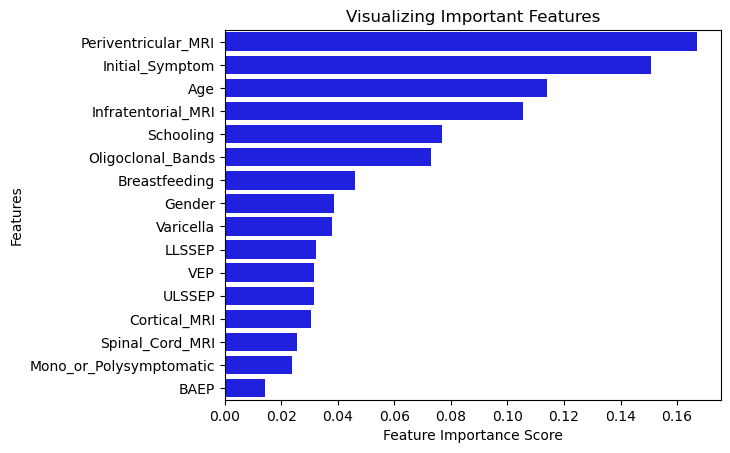

In [19]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index,color='blue')
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

The top four features with highest feature importance scores are Periventricular_MRI,Initial_Symptom,Age and Infratenorial_MRI.

# Normalize and Scaling the data <a name="scale"></a>

In [20]:
from sklearn.preprocessing import StandardScaler 
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
# normalizing the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choosing the best parameters for the model <a name="param"></a>
# Machine Learning models

1.KNN
<br>
2.Decision Tree
<br>
3.Random Forest
<br>
4.SVM
<br>
5.Adaboost
<br>
6.BernoulliNB
<br>
7.Logistic Regression
<br>
8.Ensemble Voting Classifier

In [21]:
#gridsearch cross validation
from sklearn.model_selection import GridSearchCV
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 4,
                         n_jobs = -1)
    gscv.fit(X_train , y_train)
    result = gscv.best_params_
    return result

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
gs_knn = KNeighborsClassifier()
knn_params ={'n_neighbors':[3,5,7,9,11]}
print('Best parameters for KNN: ', gridsearch(gs_knn , knn_params))
     

Best parameters for KNN:  {'n_neighbors': 3}


# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8]
dectree_params = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)
print(f'Best parameters for Decision Tree: ', gridsearch(pipe , dectree_params))

Best parameters for Decision Tree:  {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 6, 'pca__n_components': 10}


# Random Forest

In [24]:
gs_rf = RandomForestClassifier(random_state = 0)
rf_params = {
 'n_estimators':[200,500],
 'criterion': ('gini','entropy'),
 'max_depth': [2, 3 ,4],
 'min_samples_split': [2, 6],
 'max_features': ("auto", "sqrt", "log2") }
print('Best parameters for Random Forest: ', gridsearch(gs_rf , rf_params))

Best parameters for Random Forest:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}


# SVM

In [25]:
from sklearn.svm import SVC
svm_gs = SVC()
svm_params = {'C':[1,10],'gamma':[1,0.1], 'kernel':['linear','rbf']}
print(f'Best parameters for SVM: ', gridsearch(svm_gs , svm_params))

Best parameters for SVM:  {'C': 10, 'gamma': 1, 'kernel': 'linear'}


# AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
gs_adb = AdaBoostClassifier(random_state = 0)
adb_params ={
    'n_estimators':[10, 50, 100, 250, 500, 1000],
    'learning_rate':[0.001, 0.01, 0.1, 1]}
print(f'Best parameters for AdaBoost: ', gridsearch(gs_adb , adb_params))

Best parameters for AdaBoost:  {'learning_rate': 0.1, 'n_estimators': 500}


# Build Models

In [27]:
knn = KNeighborsClassifier(n_neighbors= 3)
decision_tree = DecisionTreeClassifier(criterion='entropy', 
                            max_depth=6, random_state=0)
rf  = RandomForestClassifier(max_depth=4, random_state=23 , criterion= 'entropy', 
                max_features='auto' , min_samples_split= 2 , n_estimators= 500)
svc = SVC(kernel='linear', random_state=0, gamma=1, C=10)
adb  = AdaBoostClassifier(n_estimators=500, learning_rate = 0.1, random_state=0)


# BernoulliNB

In [28]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

# Model Metrics <a name="metrics"></a>
The classification report has been generated from which we can observe the precision,recall,f1-score and accuracy for both the classes in the classification problem.

In [30]:
from sklearn.metrics import classification_report
def creport(model):
    ypred = model.predict(X_test)
    return classification_report(y_test, ypred)    

In [31]:
KNN = knn
KNN.fit(X_train,y_train)
print(creport(KNN))

              precision    recall  f1-score   support

           1       0.77      0.86      0.81        28
           2       0.87      0.79      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [32]:
SVC = svc
SVC.fit(X_train,y_train)
print(creport(SVC))

              precision    recall  f1-score   support

           1       0.77      0.96      0.86        28
           2       0.96      0.76      0.85        33

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



In [33]:
DT = decision_tree 
DT.fit(X_train,y_train)
print(creport(DT))

              precision    recall  f1-score   support

           1       0.68      0.93      0.79        28
           2       0.91      0.64      0.75        33

    accuracy                           0.77        61
   macro avg       0.80      0.78      0.77        61
weighted avg       0.81      0.77      0.77        61



In [34]:
RF = rf 
RF.fit(X_train,y_train)
print(creport(RF))

              precision    recall  f1-score   support

           1       0.76      0.89      0.82        28
           2       0.89      0.76      0.82        33

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



In [35]:
ADB = adb 
ADB.fit(X_train,y_train)
print(creport(ADB))
     

              precision    recall  f1-score   support

           1       0.79      0.93      0.85        28
           2       0.93      0.79      0.85        33

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [36]:
nv=model
nv.fit(X_train,y_train)
print(creport(nv))

              precision    recall  f1-score   support

           1       0.72      0.82      0.77        28
           2       0.83      0.73      0.77        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [37]:
lg.fit(X_train,y_train)
print(creport(lg))

              precision    recall  f1-score   support

           1       0.79      0.93      0.85        28
           2       0.93      0.79      0.85        33

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



# k fold cross validation <a name="cv"></a>

In [38]:
# Use 10-fold cross-validation to compute the mean accuracy of the models
from sklearn.model_selection import cross_val_score
import math
#KNN
cv_scores_knn = round(cross_val_score(KNN, X, y, cv=10).mean(),2)
#SVC
cv_scores_svc =  round(cross_val_score(SVC, X, y, cv=10).mean(),2)
#Decision tree
maxDepth = 6
decision_tree = tree.DecisionTreeClassifier(max_depth=maxDepth, random_state=2)
cv_scores_dt =  round(cross_val_score(decision_tree, X, y, cv=10).mean(),2)
#random forest
cv_scores_rf =  round(cross_val_score(RF, X, y, cv=10).mean(),2)
#Adaboost
cv_scores_adb =  round(cross_val_score(ADB, X, y, cv=10).mean(),2)
#bernoulliNB
cv_scores_nv =  round(cross_val_score(nv, X, y, cv=10).mean(),2)
#logistic regression
cv_scores_lg =  round(cross_val_score(lg, X, y, cv=10).mean(),2)

In [39]:
cross_val_scores =  pd.DataFrame({'Model':['KNN','SVC','Decison Trees',
                                           'Random Forest', 'AdaBoost',
                                           'Naives Bayes','Logistic Regression'],                  
    'Cross Validation Scores':[cv_scores_knn,cv_scores_svc,cv_scores_dt,
                               cv_scores_rf,cv_scores_adb,
                               cv_scores_nv,cv_scores_lg]
                  })
print(cross_val_scores)

                 Model  Cross Validation Scores
0                  KNN                     0.64
1                  SVC                     0.79
2        Decison Trees                     0.74
3        Random Forest                     0.79
4             AdaBoost                     0.80
5         Naives Bayes                     0.77
6  Logistic Regression                     0.81


From the above table we observe that Logistic Regression,Adaboost,Random Forest and SVC have the highest cross validation scores indicating that they are performing well on the dataset.A good score indicates that the model is able to recognize links and patterns in the data, which results in reliable predictions.  

## Prediction on train and test models <a name="pred"></a>

In [40]:
y_train_pred_knn = KNN.predict(X_train)
y_train_pred_svc = SVC.predict(X_train)
y_train_pred_dt = DT.predict(X_train)
y_train_pred_rf = RF.predict(X_train)
y_train_pred_adb = ADB.predict(X_train)
y_train_pred_nv = nv.predict(X_train)
y_train_pred_lg = lg.predict(X_train)

In [41]:
y_test_pred_knn = KNN.predict(X_test)
y_test_pred_svc = SVC.predict(X_test)
y_test_pred_dt = DT.predict(X_test)
y_test_pred_rf = RF.predict(X_test)
y_test_pred_adb = ADB.predict(X_test)
y_test_pred_nv= nv.predict(X_test)
y_test_pred_lg = lg.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
def accuracy(y_test , ypred):
    return round(accuracy_score(y_test , ypred),2)

In [43]:
from sklearn.metrics import f1_score
def f1(y_test , ypred):
    return round(f1_score(y_test, ypred, average='macro'),2)

In [44]:
from sklearn.metrics import recall_score
def recall(y_test , ypred):
    return round(recall_score(y_test, ypred, average='macro'),2)

In [45]:
from sklearn.metrics import precision_score
def precision(y_test , y_pred):
    return round(precision_score(y_test, y_pred),2)

In [46]:
from sklearn.metrics import roc_auc_score
def roc_auc(y_test , y_pred):
    return round(roc_auc_score(y_test, y_pred),2)

# Ensemble Voting Classifier <a name="ensemble"></a>

In [47]:
from sklearn.ensemble import VotingClassifier
# Create an ensemble voting classifier
voting_classifier = VotingClassifier(estimators=[ ('svm', SVC),('dt', DT),
                                                 ('rf',RF),('adb',ADB),
                                                 ('bernoulli',nv),('lr', lg)],
                                                 voting='hard')


# Train the ensemble classifier
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=10, gamma=1, kernel='linear',
                                  random_state=0)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=6,
                                                     random_state=0)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     n_estimators=500,
                                                     random_state=23)),
                             ('adb',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 n_estimators=500,
                                                 random_state=0)),
                             ('bernoulli

In [48]:
# Predict on the training data
y_train_pred_ensemble = voting_classifier.predict(X_train)
# Make predictions on the test set
y_test_pred_ensemble = voting_classifier.predict(X_test)
#y_test_pred_ensemble

## Compare the train and test scores for the models <a name="compare"></a>

In [49]:
all_evaluate = pd.DataFrame({'Model':['KNN','SVC','Decison Trees','Random Forest',
                                      'AdaBoost','Naives Bayes',
                                      'Logistic Regression',
                                      'Ensemble Voting Classifier'],
'Train Accuracy':[accuracy(y_train,y_train_pred_knn), 
                  accuracy(y_train,y_train_pred_svc), 
                  accuracy(y_train,y_train_pred_dt),
                  accuracy(y_train,y_train_pred_rf),
                  accuracy(y_train,y_train_pred_adb),
                  accuracy(y_train,y_train_pred_nv),
                  accuracy(y_train,y_train_pred_lg),
                  accuracy(y_train,y_train_pred_ensemble)],

'Test Accuracy':[accuracy(y_test,y_test_pred_knn),
                 accuracy(y_test,y_test_pred_svc),
                 accuracy(y_test,y_test_pred_dt),
                 accuracy(y_test,y_test_pred_rf),
                 accuracy(y_test,y_test_pred_adb),
                 accuracy(y_test,y_test_pred_nv),
                 accuracy(y_test,y_test_pred_lg),
                 accuracy(y_test,y_test_pred_ensemble)]})

print(all_evaluate)

                        Model  Train Accuracy  Test Accuracy
0                         KNN            0.86           0.82
1                         SVC            0.82           0.85
2               Decison Trees            0.89           0.77
3               Random Forest            0.90           0.82
4                    AdaBoost            0.88           0.85
5                Naives Bayes            0.78           0.77
6         Logistic Regression            0.83           0.85
7  Ensemble Voting Classifier            0.86           0.84


For SVC and Logistic Regression the test accuracy is more than training.KNN,Random Forest,Adaboost and Ensemble voting classifier all have test accuracy more than 80% but score less than their training accuracy results.

# Prediction results <a name="predresults"></a>

In [50]:

all_evaluate = pd.DataFrame({'Model':['KNN','SVC','Decision Trees','Random Forest',
                                      'AdaBoost','Naives Bayes',
                                      'Logistic Regression',
                                      'Ensemble Voting Classifier'],
                             
'Accuracy':[accuracy(y_test,y_test_pred_knn), accuracy(y_test,y_test_pred_svc),
            accuracy(y_test,y_test_pred_dt), accuracy(y_test,y_test_pred_rf),
            accuracy(y_test,y_test_pred_adb),accuracy(y_test,y_test_pred_nv),
            accuracy(y_test,y_test_pred_lg),
            accuracy(y_test,y_test_pred_ensemble)],
                             
'Precision':[precision(y_test,y_test_pred_knn), precision(y_test,y_test_pred_svc),
             precision(y_test,y_test_pred_dt),precision(y_test,y_test_pred_rf),
             precision(y_test,y_test_pred_adb),precision(y_test,y_test_pred_nv),
             precision(y_test,y_test_pred_lg),precision(y_test,y_test_pred_ensemble)],                           
   
                     
'Recall':[recall(y_test,y_test_pred_knn),recall(y_test,y_test_pred_svc), 
          recall(y_test,y_test_pred_dt),recall(y_test,y_test_pred_rf),
          recall(y_test,y_test_pred_adb),recall(y_test,y_test_pred_nv),
          recall(y_test,y_test_pred_lg),
          recall(y_test,y_test_pred_ensemble)] ,
                                      
'F1':[f1(y_test,y_test_pred_knn), f1(y_test,y_test_pred_svc), 
      f1(y_test,y_test_pred_dt),f1(y_test,y_test_pred_rf),
      f1(y_test,y_test_pred_adb),f1(y_test,y_test_pred_nv),
      f1(y_test,y_test_pred_lg),f1(y_test,y_test_pred_ensemble)],
                             
'ROC_AUC':[roc_auc(y_test,y_test_pred_knn), roc_auc(y_test,y_test_pred_svc),
           roc_auc(y_test,y_test_pred_dt),roc_auc(y_test,y_test_pred_rf),
           roc_auc(y_test,y_test_pred_adb),roc_auc(y_test,y_test_pred_nv),
           roc_auc(y_test,y_test_pred_lg),roc_auc(y_test,y_test_pred_ensemble)]   
                              
                            
                            })
print(all_evaluate)

                        Model  Accuracy  Precision  Recall    F1  ROC_AUC
0                         KNN      0.82       0.77    0.82  0.82     0.82
1                         SVC      0.85       0.77    0.86  0.85     0.86
2              Decision Trees      0.77       0.68    0.78  0.77     0.78
3               Random Forest      0.82       0.76    0.83  0.82     0.83
4                    AdaBoost      0.85       0.79    0.86  0.85     0.86
5                Naives Bayes      0.77       0.72    0.77  0.77     0.77
6         Logistic Regression      0.85       0.79    0.86  0.85     0.86
7  Ensemble Voting Classifier      0.84       0.76    0.84  0.84     0.84


We select the top four models of SVC,Adaboost and Logistic Regression with prediction accuracy of 85% and Ensemble Voting classifier with 84% accuracy.

# Explainable AI <a name="AI"></a>

In [51]:
!pip install shap

# SVC model

  0%|          | 0/61 [00:00<?, ?it/s]

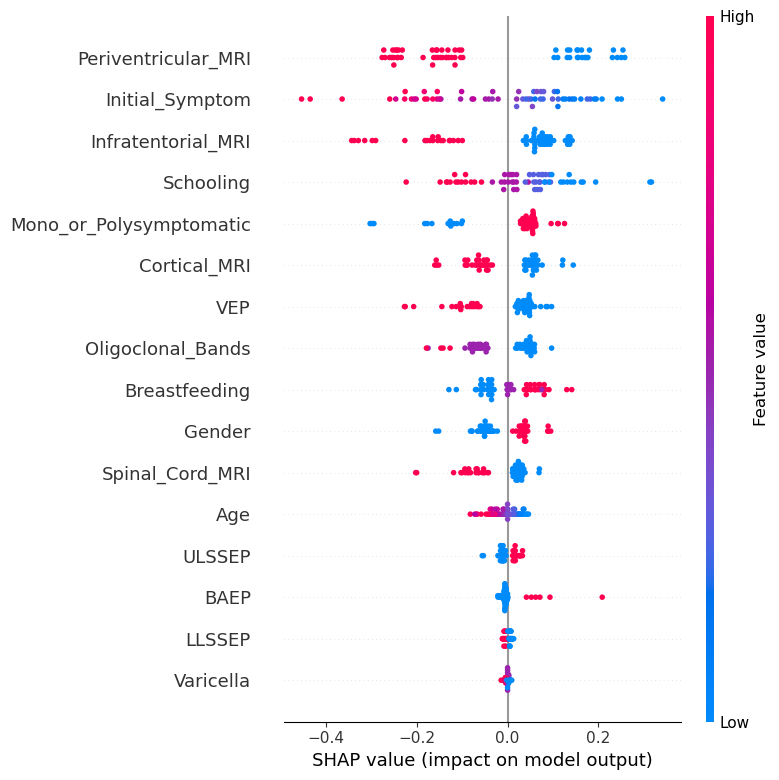

In [52]:
import shap
# Create a summarized background dataset using shap.sample
#it is computationally expensive to use large number of samples 
#for kernelexplainer so we reduce the number of samples
background_data = shap.sample(X_train, 100)  
# Adjust the number of samples as needed

# Create a kernel explainer object using your trained model 
#and the summarized background dataset
explainer = shap.KernelExplainer(SVC.predict, background_data)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)
# Interpret the SHAP values or perform desired analysis
shap.summary_plot(shap_values, X_test,feature_names=X_names) 

The features are ordered in descending order of importance.So the features at the top have higher importance over the lower ranked features.The reddish colors indicate high feature values and the bluish colors indicate low feature values.Usually, the plot has a vertical dashed line at zero that is either centred on the plot or parallel to the y-axis. The model's predictions are negatively impacted by features to the left of the zero line, while positively affected by those to the right. A bar's impact increases with how far to the left or right it stretches.
<br>
1.Low values of Periventricular_MRI,Initial_Symptom,Infratenorial_MRI and Schooling have a positive impact on the model predictions while high values have a negative impact.
2.Mono_or_Polysymptomatic,Breastfeeding and Gender variables have high values with a positive impact on model predictions and low values with negative impact.

# Results and Discussion <a name="results"></a>


In [53]:
results = pd.DataFrame({'Model':['AdaBoost','Logistic Regression','SVC',
                                 'Ensemble Voting Classifier'],
                             
'Accuracy':[accuracy(y_test,y_test_pred_adb),accuracy(y_test,y_test_pred_lg),
            accuracy(y_test,y_test_pred_svc),
            accuracy(y_test,y_test_pred_ensemble)],
                             
'Precision':[precision(y_test,y_test_pred_adb),precision(y_test,y_test_pred_lg),
             precision(y_test,y_test_pred_svc),
             precision(y_test,y_test_pred_ensemble)],                           
   
                     
'Recall':[recall(y_test,y_test_pred_adb),recall(y_test,y_test_pred_lg),
          recall(y_test,y_test_pred_svc),
          recall(y_test,y_test_pred_ensemble)] ,
                                      
'F1':[f1(y_test,y_test_pred_adb),f1(y_test,y_test_pred_lg),
      f1(y_test,y_test_pred_svc),
      f1(y_test,y_test_pred_ensemble)],
                             
'ROC_AUC':[roc_auc(y_test,y_test_pred_adb),roc_auc(y_test,y_test_pred_lg),
           roc_auc(y_test,y_test_pred_svc),
           roc_auc(y_test,y_test_pred_ensemble)]   
                              
                            
                            })
print(results)

                        Model  Accuracy  Precision  Recall    F1  ROC_AUC
0                    AdaBoost      0.85       0.79    0.86  0.85     0.86
1         Logistic Regression      0.85       0.79    0.86  0.85     0.86
2                         SVC      0.85       0.77    0.86  0.85     0.86
3  Ensemble Voting Classifier      0.84       0.76    0.84  0.84     0.84


The results are in the above table. We selected the top four models out of the eight with above 84% accuracy.
## Accuracy
Adaboost,Logistic Regression and SVC all have an accuracy of 85% while Ensemble Voting classifier has 84% accuracy.So we see that ensemble and standalone models produce almost similar resuts for the dataset.A high accuracy rate suggests that the model makes a good proportion of correct predictions.

## Precision and Recall
Precision and recall also have almost similar scores for all the models.Adaboost and Logistic Regression have the highest precision of 0.79 out of all four models.Precision calculates the percentage of true positive predictions made out of all  positive predictions, while  Recall evaluates the percentage of true positive predictions made out of all actual positive instances.

## F1
The F1 score combines both precision and recall into a single metric, providing a balanced measure of a model's performance.
The F1 score is calculated as the harmonic mean of precision and recall, given by the formula:
<br>
F1 score = 2 * (precision * recall) / (precision + recall)
<br>
A good F1 score indicates better model performance both in terms of precision and recall.Adaboost,Logistic Regression and SVC all have a F1 score of 0.85 while Ensemble Voting classifier has 0.84 F1 score.We observe that the accuracy and F1 scores are same for all the four models. The high scores indicate that the model is performing well in terms of both overall correctness and the balance between precision and recall. 

## ROC-AUC Score
A binary classification model's ability to accurately rank positive instances higher than negative instances at various classification thresholds is measured by the ROC-AUC score. Better performance and discriminative capacity of the model are indicated by a higher ROC-AUC score.Adaboost,Logistic Regression and SVC have 0.86 ROC_AUC score while Ensemble Voting classifier has a ROC_AUC score of 0.84.


# Conclusion <a name="concl"></a>
The data was preprocessed to remove null values and class imbalance was checked.Also the data was scaled and normalized before building the machine learning models. We used GridSearchCV to select the optimal parameters to build the models.10-fold cross validation was done for each model. We used various performance metrics such as Accuracy,Precision,Recall,F1,ROC_AUC to analyse the performance of the models. Finally we selected four models with the highest accuracy scores. Adaboost,Logistic Regression and SVC all have an accuracy of 85% while Ensemble Voting classifier has 84% accuracy. The standalone and ensemble models produced almost similar results. There is not much to differentiate among the models in term of accuracy, recall,F1 and ROC_AUC scores with all of them being almost same for all the models.Adaboost and Logistic Regression have the highest precision of 0.79 out of all four models.
<br>
We also look forward to how we can improve the performance of the models and achieve above 90% accuracy and also how it will perform on more data and more number of predictor variables.In future such models can be used in healthcare sector for prediction of CDMS in patients.

# References <a name="ref"></a>
1.Pineda, Benjamin; Flores Rivera, Jose De Jesus (2023), “Conversion predictors of Clinically Isolated Syndrome to Multiple Sclerosis in Mexican patients: a prospective study.”, Mendeley Data, V1, doi: 10.17632/8wk5hjx7x2.1
<br>
2.Pandey, A. K. (2022, March 3). K-Nearest Neighbor(KNN) algorithm in Machine Learning. Medium. https://adityapande107.medium.com/k-nearest-neighbor-knn-algorithm-in-machine-learning-e832a7f09e07
<br>
3.1.10. Decision Trees. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/tree.html
<br>
4.Wikipedia contributors. (2023). Random forest. Wikipedia. https://en.wikipedia.org/wiki/Random_forest
<br>
5.Saini, A. (2023). Support Vector Machine(SVM): A Complete guide for beginners. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/
<br>
6.Sureshan, S. (2022). Introduction to AdaBoost for Absolute Beginners. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/01/introduction-to-adaboost-for-absolute-beginners/
<br>
7.Mutha, N. (2020). Bernoulli Naive Bayes. OpenGenus IQ: Computing Expertise & Legacy. https://iq.opengenus.org/bernoulli-naive-bayes/
<br>
8.GeeksforGeeks. (2023). Logistic Regression in Machine Learning. GeeksforGeeks. https://www.geeksforgeeks.org/understanding-logistic-regression/
<br>
9.GeeksforGeeks. (2019). ML   Voting Classifier using Sklearn. GeeksforGeeks. https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/
<br>